<a id="3"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

In [2]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from collections import Counter


<a id="4"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

In [3]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

for other in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities"): 
    if other.endswith(".png") or other.endswith(".jpg"): 
        image_list_other.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities",
                                             other))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities", other))
        
for safe in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/safe_driving"): 
    if safe.endswith(".png") or safe.endswith(".jpg"): 
        image_list_safe.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/safe_driving", 
                                            safe))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/safe_driving",
                           safe))
        
for talking in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/talking_phone"): 
    if talking.endswith(".png") or talking.endswith(".jpg"): 
        image_list_talking.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/talking_phone", 
                                               talking))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/talking_phone",
                           talking))
        
for text in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/texting_phone"): 
    if text.endswith(".png") or text.endswith(".jpg"): 
        image_list_text.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/texting_phone",
                                            text))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/texting_phone",
                           text))
        
for turn in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/turning"): 
    if turn.endswith(".png") or turn.endswith(".jpg"): 
        image_list_turn.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/turning",
                                            turn))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/turning", 
                           turn))
    
    

/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_11798.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_1493.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_11997.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/2019-04-2417-16-29.png
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_15918.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_12736.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_10647.jpg
/Users/prajw

In [4]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

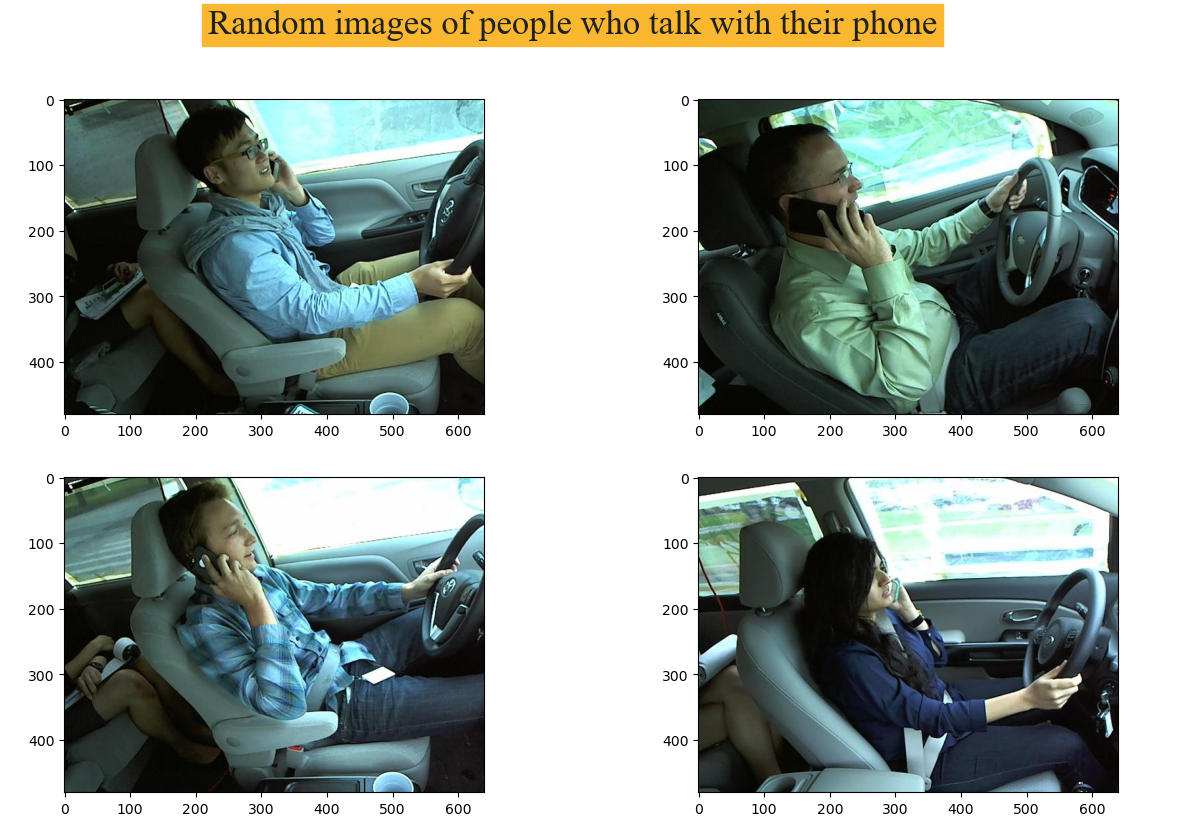

In [5]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

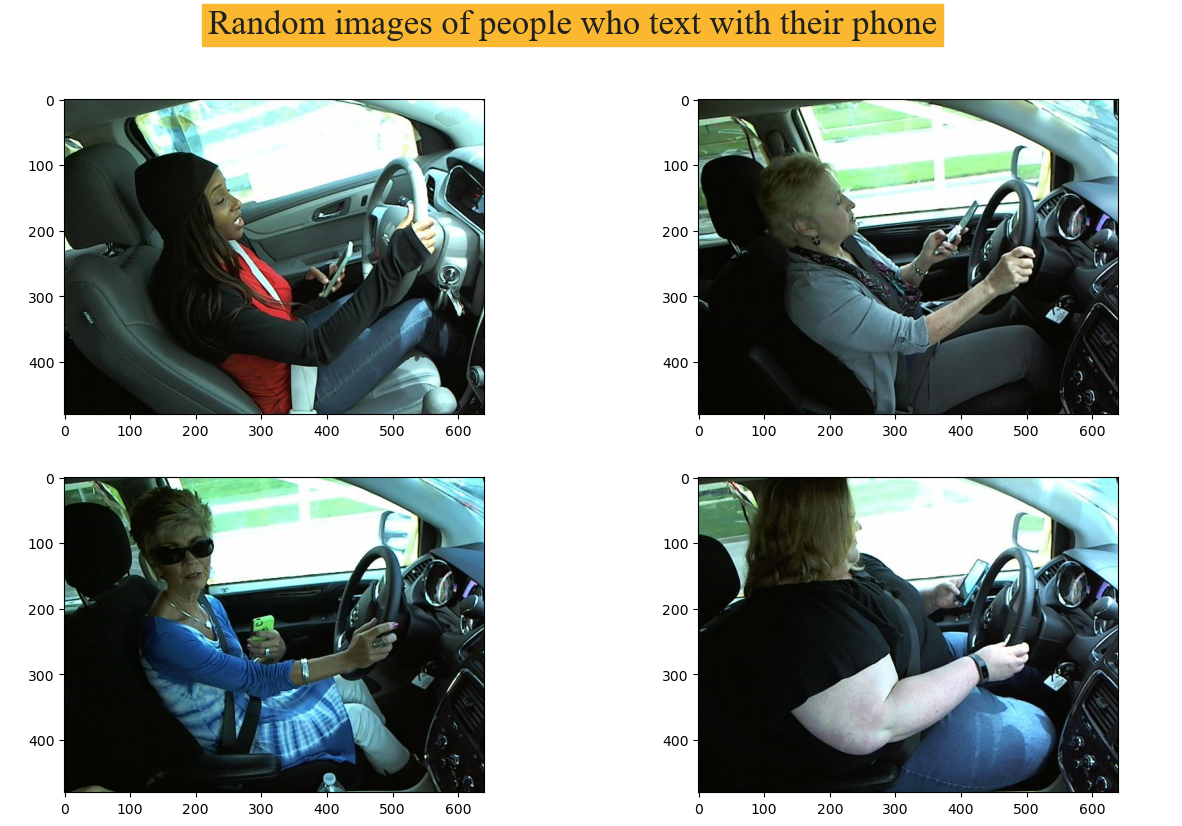

In [6]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

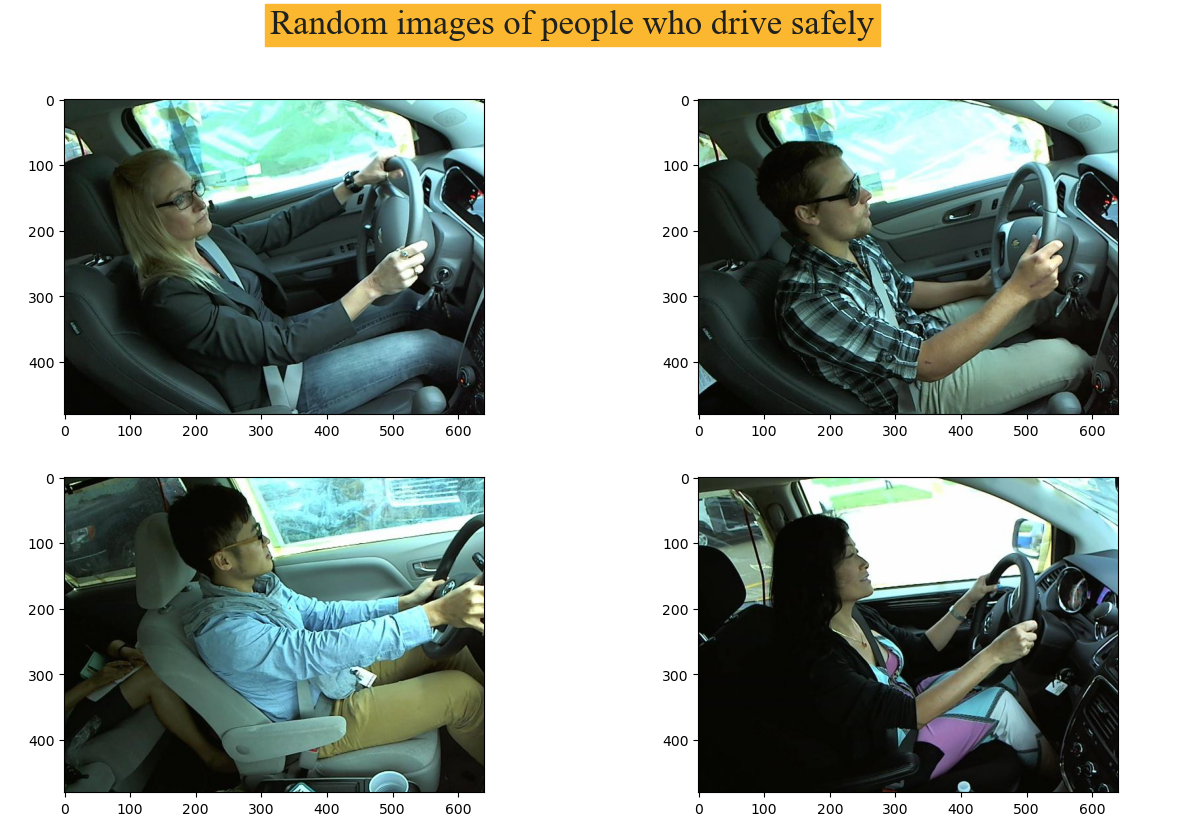

In [7]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

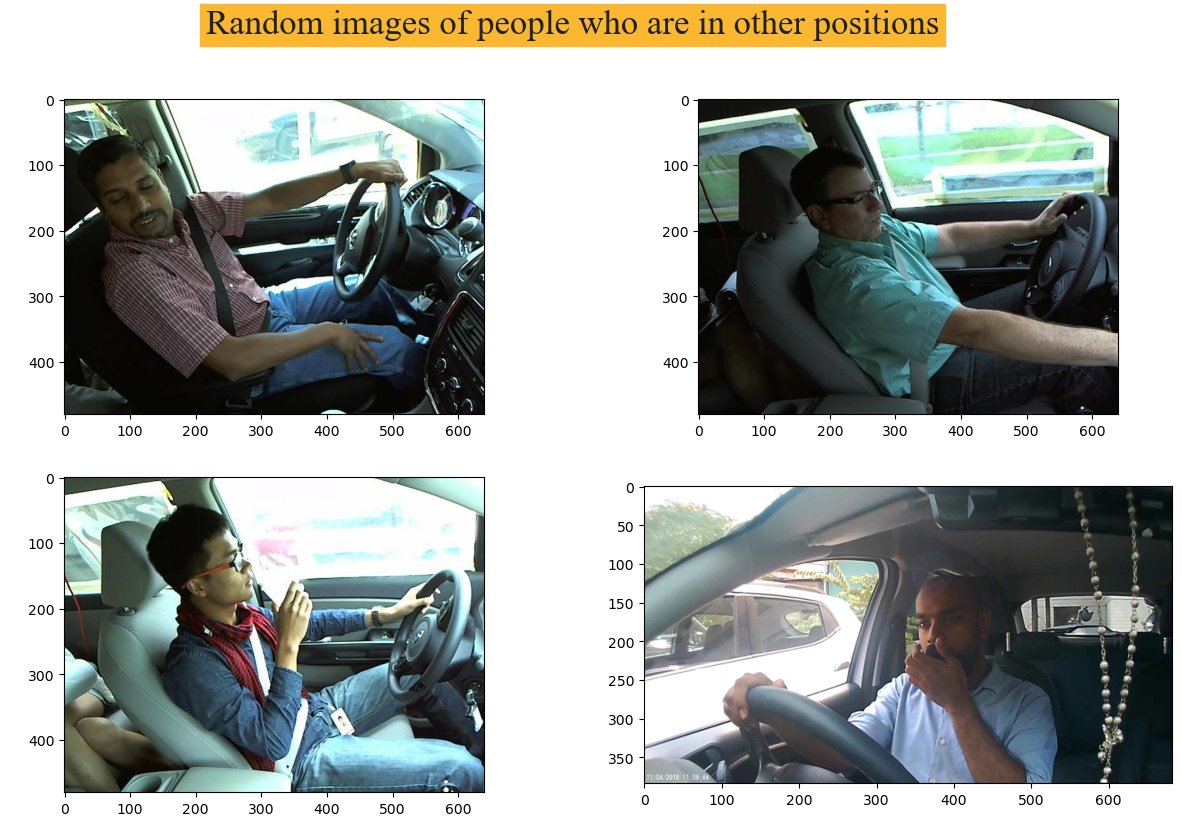

In [8]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [9]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  808
Number of samples in (Class = Safe Driving) =  1068
Number of samples in (Class = Talking Phone) =  957
Number of samples in (Class = Texting Phone) =  431
Number of samples in (Class = Turning) =  675


In [10]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

606.0 161.60000000000002 40.400000000000006
801.0 213.60000000000002 53.400000000000006
717.75 191.4 47.85
323.25 86.2 21.55
506.25 135.0 33.75


In [11]:
print("Train","Test", "Valid")

train_other = image_list_other[:606]
test_other = image_list_other[607:767]
valid_other = image_list_other[768:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:801]
test_safe = image_list_safe[802:1015]
valid_safe = image_list_safe[1016:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:717]
test_talking = image_list_talking[718:931]
valid_talking = image_list_talking[932:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:323]
test_text = image_list_text[324:410]
valid_text = image_list_text[411:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:506]
test_turn = image_list_turn[507:642]
valid_turn = image_list_turn[643:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
606 160 40
801 213 52
717 213 25
323 86 20
506 135 32


In [12]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [13]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [14]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [15]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [16]:
train_df.head()

image  label
0  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
1  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
2  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
3  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
4  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other

In [17]:
val_df.tail()

image label
27  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
28  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
29  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
30  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
31  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn

In [18]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  2953
Number of rows in test dataframe is:  807
Number of rows in val dataframe is:  169


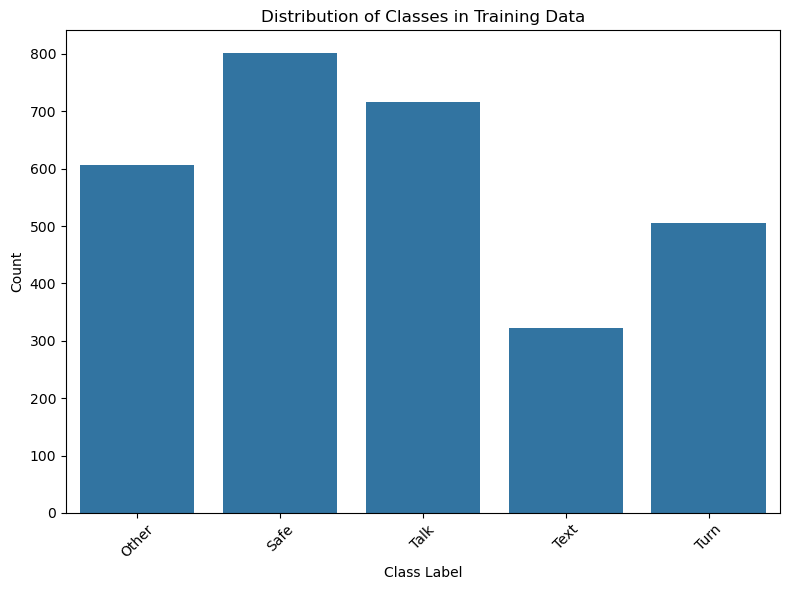

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of classes in train_df
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_df)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()



5. Calculate the ratio of images

   It's really important in some cases for knowing the ratio of images that we use. We can use cv2.imread for this part.

In [20]:
random_img_height = random.choice(train_other)

6. Define hyperparameters

    Some of the hyperparameters should be considering before the model goes to start. I set Batch size as 64, ofcourse you can use 32 or any     other popular numbers or you can use some functions for checking the best number of that but it costs lots of run time and I just want       to pick some experimental value. Also for AlexNet, ResNet and VGGNet its popular to use height and width as a 240*240 format.

In [21]:
Batch_size = 64
Img_height = 240
Img_width = 240

7. Rescale the images

     Its really important to rescale the images and put all of the images in a same shape for input layer of model.

In [22]:
trainGenerator = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

8. Input Model

Now we can use flow from dataframe that mentioned before. It helps to call images from some dataframes and mention the label as target.

In [23]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 2953 validated image filenames belonging to 5 classes.
Found 807 validated image filenames belonging to 5 classes.
Found 169 validated image filenames belonging to 5 classes.


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is AlexNet?**

  - AlexNet is a convolutional neural network (CNN) architecture that was introduced by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It is used primarily for image recognition and classification tasks. AlexNet was the winner of the ImageNet Large Scale Visual Recognition Challenge in 2012, which marked a breakthrough in deep learning. The network contains eight layers; the first five are convolutional layers, some of them followed by max-pooling layers, and the last three are fully connected layers. The network is split into two copies, each run on one GPU. AlexNet uses ReLU activation functions and dropout regularization to prevent overfitting. The architecture of AlexNet has inspired many other CNN architectures that have been developed since its introduction.
   


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Model Structure**

  - You can see the structure of AlexNet in the cell below.
   


In [23]:
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 58, 58, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

In [24]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [25]:
Alex_model = model_Alex.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.2741 - loss: 1.2249 - val_accuracy: 0.2367 - val_loss: 0.6628
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.4052 - loss: 0.4545 - val_accuracy: 0.2781 - val_loss: 0.5395
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 171s 4s/step - accuracy: 0.4611 - loss: 0.4122 - val_accuracy: 0.4083 - val_loss: 0.4642
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.5678 - loss: 0.3615 - val_accuracy: 0.4320 - val_loss: 0.5020
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.6009 - loss: 0.3304 - val_accuracy: 0.5799 - val_loss: 0.3455
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.6893 - loss: 0.2769 - val_accuracy: 0.5325 - val_loss: 0.4070
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 576s 12s/step - accuracy: 0.7111 - loss: 0.2707 - val_accuracy: 0.7988 - val_loss: 0.2183
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1062s 23s/step - accuracy: 0.7968 - loss: 0.1977 - val_accuracy: 0.7396 

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3. Output**

  - We can plot the output of model for each epoch. For this matter, we can use **.history** and extract the **train and valid loss and accuracy**. Then we can plot both of them and find out the path of learning.
   


In [27]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

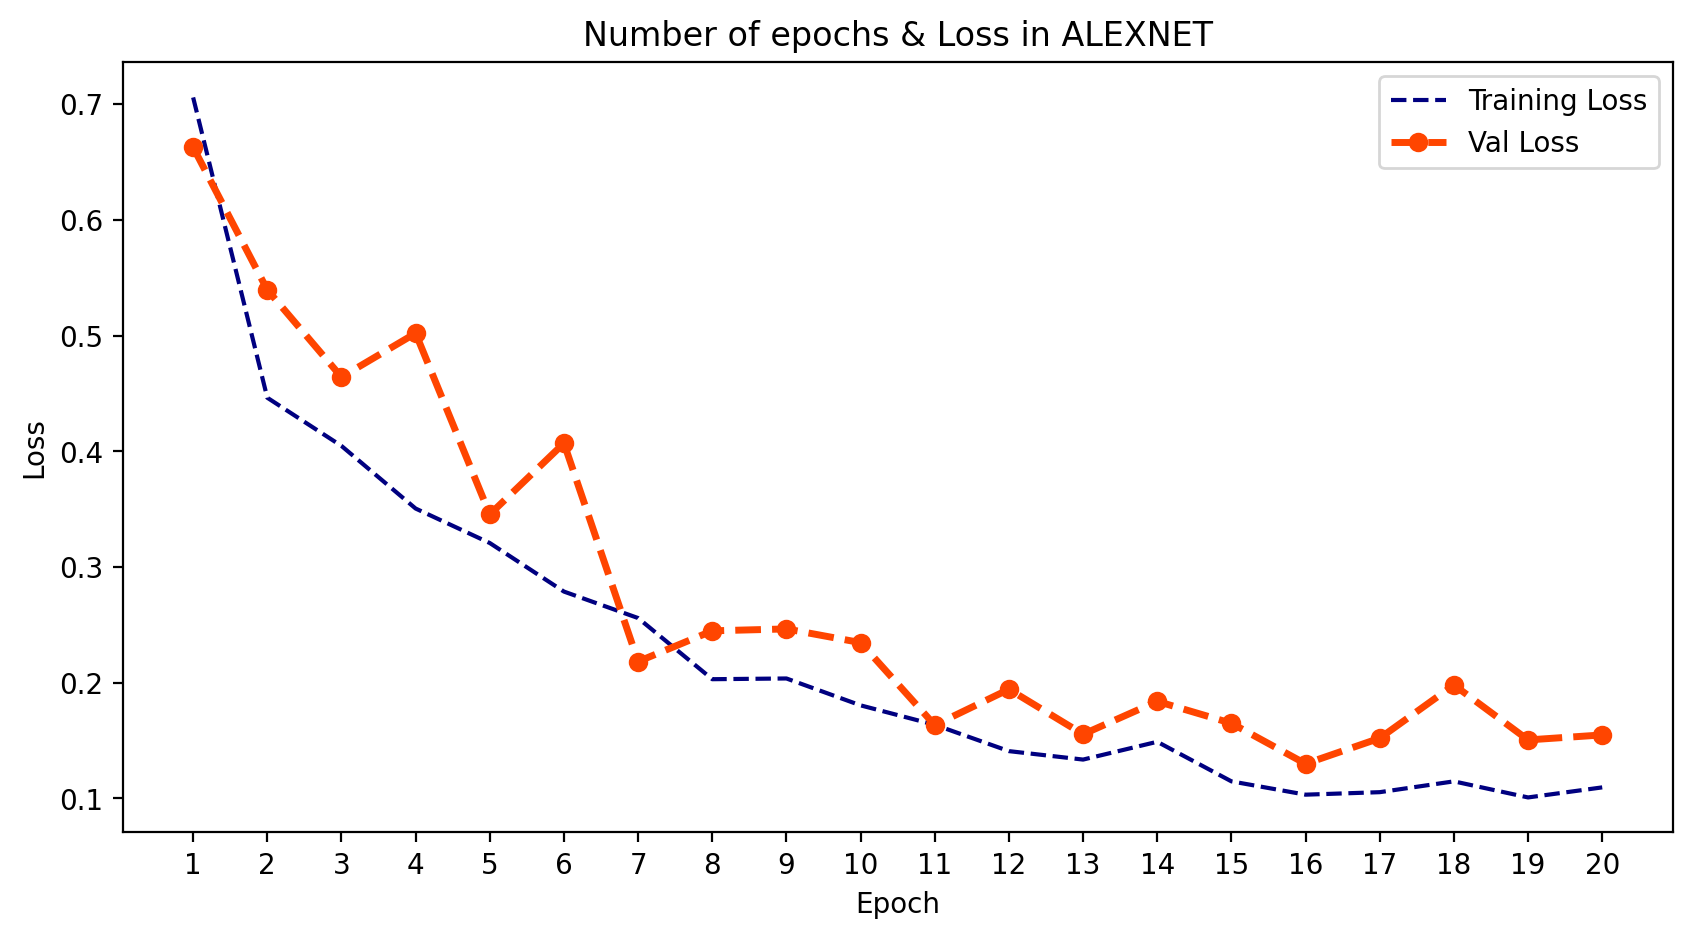

In [28]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

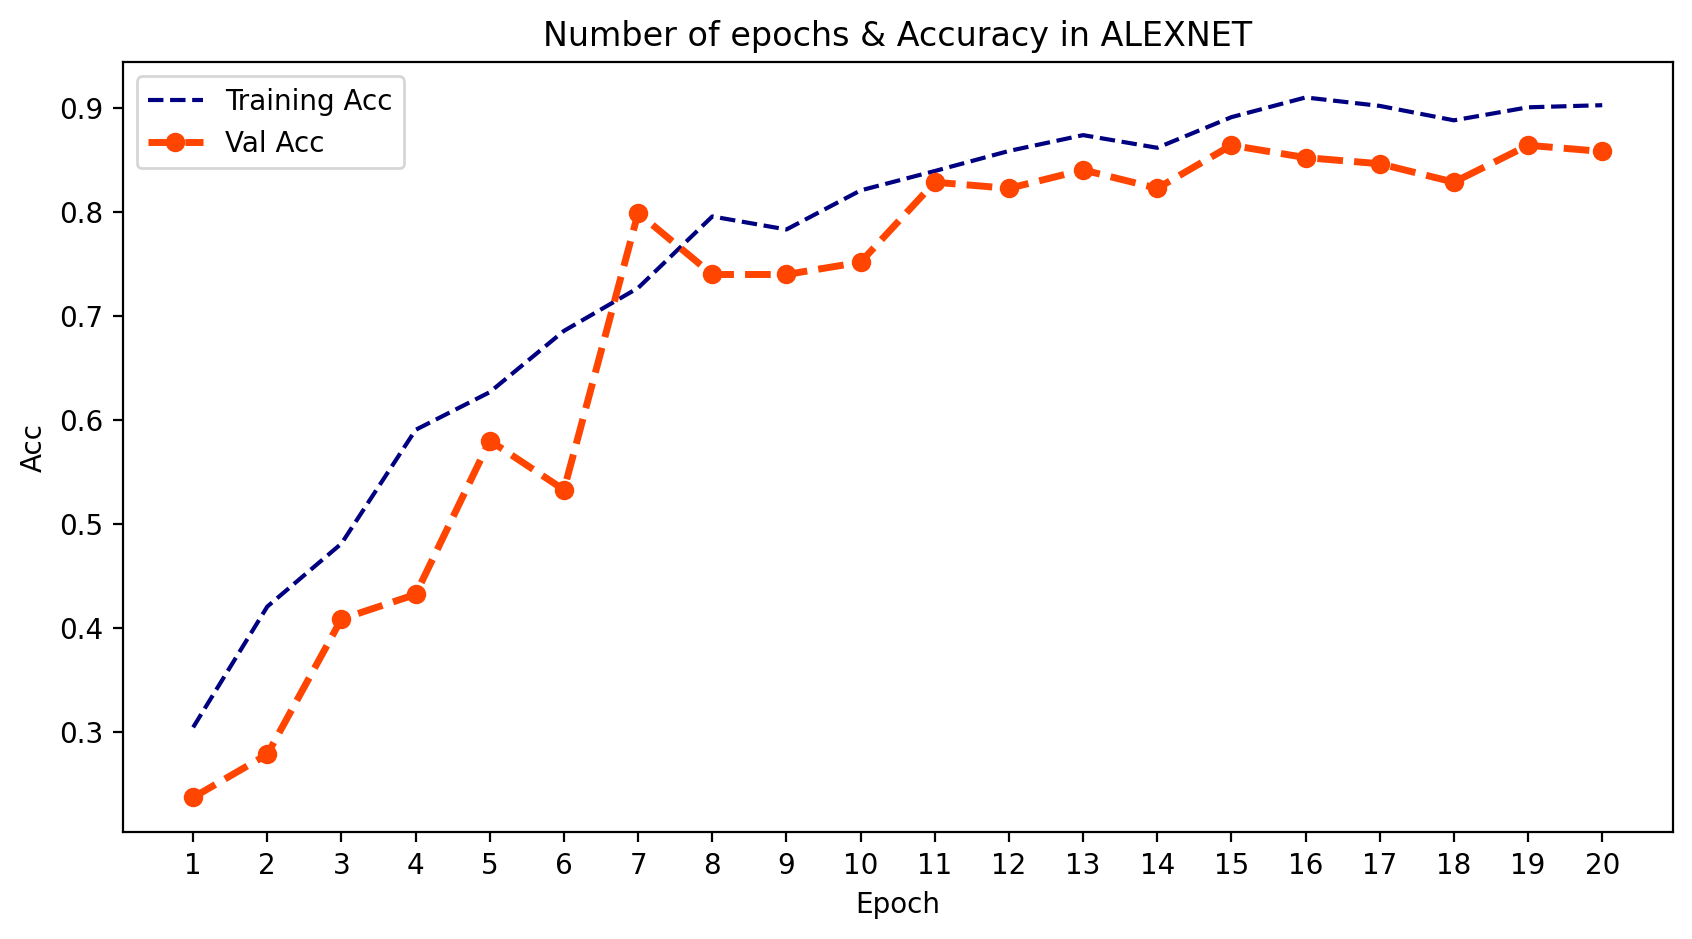

In [29]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step
Accuracy (Sampled): 0.8599
Classification Report (Sampled):
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       141
           1       0.98      0.91      0.94       172
           2       0.81      0.88      0.84        81
           3       0.91      0.85      0.88        73
           4       0.88      0.71      0.79       104

    accuracy                           0.86       571
   macro avg       0.86      0.85      0.85       571
weighted avg       0.87      0.86      0.86       571

[[128   0   7   0   6]
 [  9 156   0   3   4]
 [ 10   0  71  

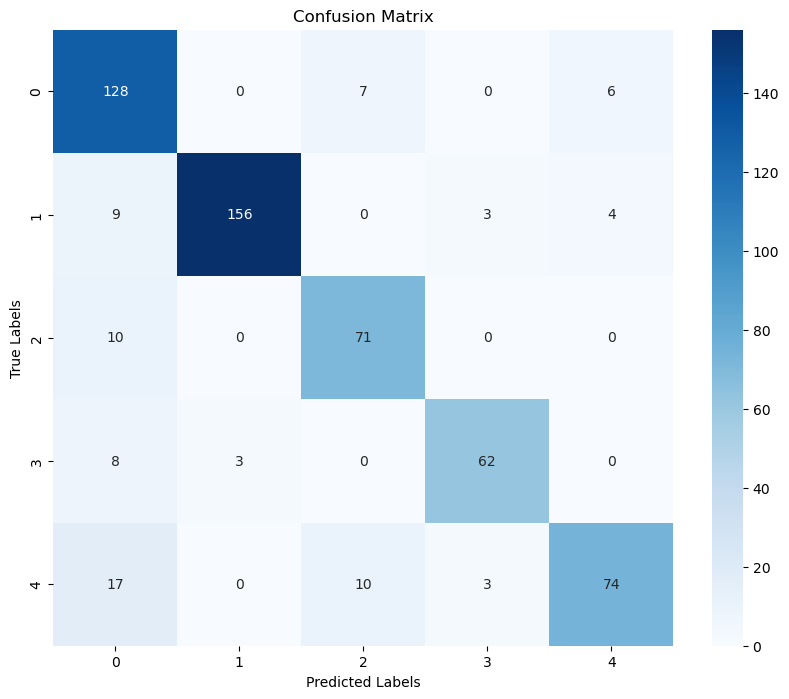

In [30]:
# Define a function to sample data from a DataFrameIterator
def sample_from_iterator(iterator, sample_size):
    sampled_data = []
    for _ in range(sample_size):
        try:
            x_batch, y_batch = next(iterator)
            sampled_data.append((x_batch, y_batch))
        except StopIteration:
            break
    return sampled_data

# Reset the iterator
valDataset.reset()

# Sample size
sample_size = 10 # Adjust as needed

# Sample from the iterator
sampled_data = sample_from_iterator(valDataset, sample_size)
# Initialize lists for predictions and true labels
val_predictions = []
y_true = []

# Process sampled data
for x_batch, y_batch in sampled_data:
    # Make predictions for the batch using the trained model
    batch_predictions = model_Alex.predict(x_batch)
    val_predictions.append(batch_predictions)
    y_true.append(y_batch)

# Concatenate predictions and true labels
val_predictions = np.concatenate(val_predictions, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Get predicted labels
y_pred = np.argmax(val_predictions, axis=1)

# Convert y_true from one-hot to label indices (if needed)
y_true_labels = np.argmax(y_true, axis=1) if y_true.ndim > 1 else y_true

# Calculate and print accuracy
accuracy = accuracy_score(y_true_labels, y_pred)
print(f"Accuracy (Sampled): {accuracy:.4f}")

# Generate classification report
print("Classification Report (Sampled):")
print(classification_report(y_true_labels, y_pred))

# Optionally, plot the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred)
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(conf_matrix.shape[1])], 
            yticklabels=[str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


<a id="7"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">VGGNet </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is VGGNet?**

  - VGGNet, also known as Visual Geometry Group, is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers, respectively. The VGG architecture is the basis of ground-breaking object recognition models. Developed as a deep neural network, the VGGNet also surpasses baselines on many tasks and datasets beyond ImageNet. Moreover, it is still one of the most popular image recognition architectures.
   


2. Model Structure

    You can see the structure of VGGNet in the cell below.


In [38]:
trainGenerator = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [32]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 2953 validated image filenames belonging to 5 classes.
Found 807 validated image filenames belonging to 5 classes.
Found 169 validated image filenames belonging to 5 classes.


In [33]:
def VGGNet():
    inp = layers.Input((120, 120, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 118, 118, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 116, 116, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 116, 116, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 54, 54, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 54, 54, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 23, 23, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 32,831,557 (125.24 MB)

 Trainable params: 32,830,661 (125.24 MB)

 Non-trainable params: 896 (3.50 KB)

In [34]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


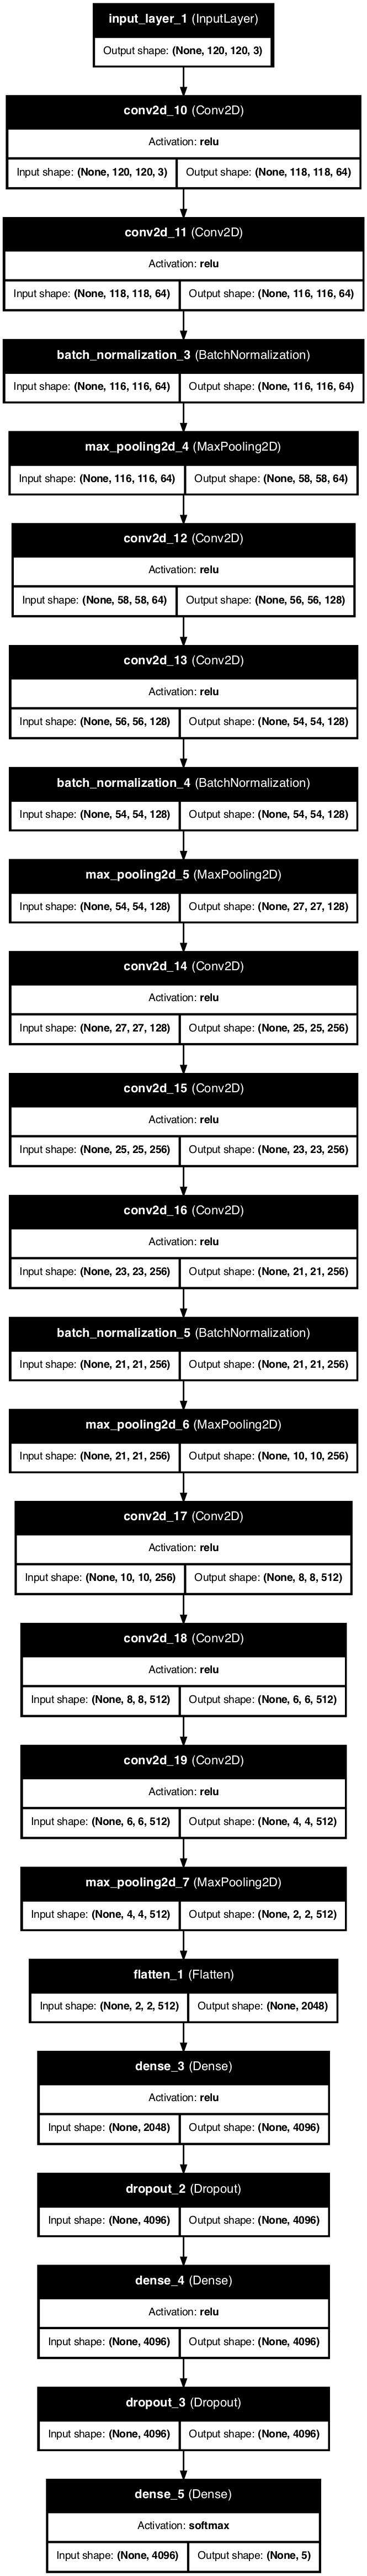

In [35]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [36]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [37]:
VGG_model = model_VGG.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 120, 120, 3), found shape=(None, 240, 240, 3)